### unit8 인구 구조를 다양한 형태로 시각화하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

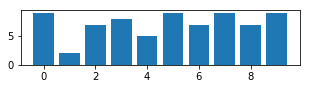

In [4]:
# 막대그래프 (X, Y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10, size=10))

<BarContainer object of 10 artists>

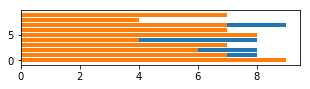

In [16]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10, size=10), label = 'a') #bar horizontal
plt.barh(np.arange(10), np.random.randint(1,10, size=10), label = 'b') #bar horizontal

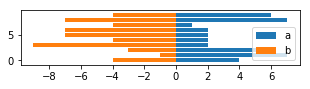

In [20]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10, size=10), label = 'a') #bar horizontal
plt.barh(np.arange(10), - np.random.randint(1,10, size=10), label = 'b') #bar horizontal
plt.legend()

########################################################################

In [129]:
# p115
df = pd.read_csv('GyeongGi.csv', encoding='cp949')
df = df.replace(',', '', regex=True) 
df.shape

(3842, 207)

In [119]:
df.head(3)

,행정구역,2019년05월_남_총인구수,2019년05월_남_연령구간인구수,2019년05월_남_0세,2019년05월_남_1세,2019년05월_남_2세,2019년05월_남_3세,2019년05월_남_4세,2019년05월_남_5세,2019년05월_남_6세,...,2019년05월_여_91세,2019년05월_여_92세,2019년05월_여_93세,2019년05월_여_94세,2019년05월_여_95세,2019년05월_여_96세,2019년05월_여_97세,2019년05월_여_98세,2019년05월_여_99세,2019년05월_여_100세 이상
0,서울특별시 (1100000000),4 766 085,4 766 085,27 555,29 820,32 375,35 374,36 243,35 430,37 918,...,5 447,4 224,3 122,2 294,1 937,1 752,1 254,811,632,4 526
1,서울특별시 종로구 (1111000000),74 240,74 240,326,319,379,410,443,424,495,...,112,88,76,53,43,39,39,18,26,163
2,서울특별시 종로구 청운효자동(1111051500),6 015,6 015,28,32,40,41,60,39,48,...,4,4,9,3,4,3,1,3,3,13


- 특정 도시(경기도)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세~ 남 90세, 여 0세~ 여 90세
- 0세: 10명 1세: 20명 ... 도시에서 모두 누적 > 막대 그래프로 표현

In [106]:
df.columns

Index(['행정구역', '2019년05월_남_총인구수', '2019년05월_남_연령구간인구수', '2019년05월_남_0세',
       '2019년05월_남_1세', '2019년05월_남_2세', '2019년05월_남_3세', '2019년05월_남_4세',
       '2019년05월_남_5세', '2019년05월_남_6세',
       ...
       '2019년05월_여_91세', '2019년05월_여_92세', '2019년05월_여_93세', '2019년05월_여_94세',
       '2019년05월_여_95세', '2019년05월_여_96세', '2019년05월_여_97세', '2019년05월_여_98세',
       '2019년05월_여_99세', '2019년05월_여_100세 이상'],
      dtype='object', length=207)

In [172]:
max_age = 99
#city = '경기도 안양시 동안구'
city = '동안구'
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
#type(list(df.columns))

columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index], columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_99세')

In [173]:
data = np.array(df)
area = data[:,0]
area[:3]
city_row_index = -1

for i in range(len(area)):
    if city in area[i]:
        city_row_index = i
        print(i, area[i], city_row_index)

1395 경기도 안양시 동안구 (4117300000) 1395
1396 경기도 안양시 동안구 비산1동(4117351000) 1396
1397 경기도 안양시 동안구 비산2동(4117352000) 1397
1398 경기도 안양시 동안구 비산3동(4117353000) 1398
1399 경기도 안양시 동안구 부흥동(4117354000) 1399
1400 경기도 안양시 동안구 달안동(4117354600) 1400
1401 경기도 안양시 동안구 관양1동(4117355000) 1401
1402 경기도 안양시 동안구 관양2동(4117356000) 1402
1403 경기도 안양시 동안구 부림동(4117356600) 1403
1404 경기도 안양시 동안구 평촌동(4117357000) 1404
1405 경기도 안양시 동안구 평안동(4117357600) 1405
1406 경기도 안양시 동안구 귀인동(4117357800) 1406
1407 경기도 안양시 동안구 호계1동(4117358000) 1407
1408 경기도 안양시 동안구 호계2동(4117359000) 1408
1409 경기도 안양시 동안구 호계3동(4117360000) 1409
1410 경기도 안양시 동안구 범계동(4117361000) 1410
1411 경기도 안양시 동안구 신촌동(4117362000) 1411
1412 경기도 안양시 동안구 갈산동(4117363000) 1412


In [174]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index+max_age]
city_woman = city_data[woman_0_index:woman_0_index+max_age]
city_man.shape, city_woman.shape

((99,), (99,))

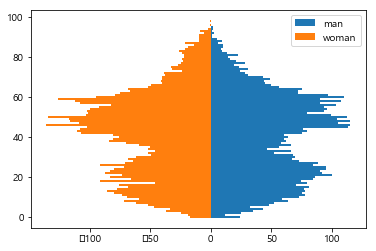

In [175]:
city_man = city_man.astype(np.int)
city_woman = city_woman.astype(np.int)
m = plt.barh(np.arange(len(city_man)), city_man, label = 'man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label = 'woman')
m = plt.legend()

########################################################################

In [147]:
city = '경기' # 이 글자가 들어간 행은 전부 찾아, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])
#is_contain[0], is_contain[-1]

np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(613, 207)

In [148]:
#np.sum(city_data, axis=0)
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

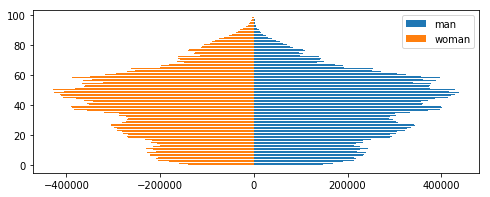

In [149]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

########################################################################

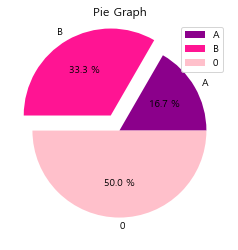

In [160]:
# p130, p134 파이 돌출 효과
plt.rc('font', family= 'Malgun Gothic')
color = ['darkmagenta','deeppink', 'pink']
plt.title('Pie Graph')
n = plt.pie([10,20,30], labels=['A','B','0'], autopct='%.1f %%', colors=color, explode=(0,0.2,0))
n = plt.legend()

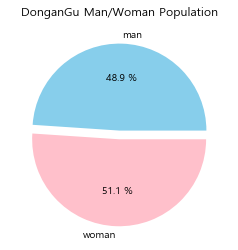

In [177]:
plt.title('DonganGu Man/Woman Population')
color = ['skyblue','pink']
n = plt.pie([np.sum(city_man), np.sum(city_woman)], labels = ['man', 'woman']
            , colors=color, autopct='%.1f %%', explode=(0,0.1))

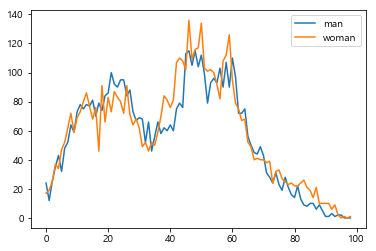

In [182]:
p = plt.plot(city_man, label = 'man')
p = plt.plot(city_woman, label = 'woman')
p= plt.legend()

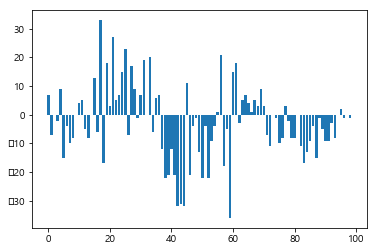

In [185]:
# p144 남녀 인구의 차이
p = plt.bar(np.arange(len(city_man)), city_man - city_woman)

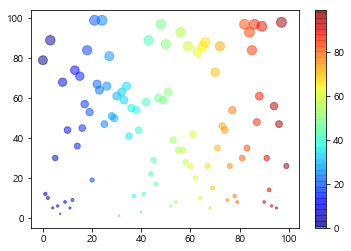

In [198]:
# p144 산점도(scatter) 산개할 산, 점 점, 그림 도, p146 s(size), c(color)
y = np.random.randint(0,100,size=100)
n = plt.scatter(np.arange(len(y)),y,
                #[1,2,3,4],[10,30,20,50]
                #, c=['r','b','g','y']
                #, s=[10,20,30,40]
                s=y, c=range(len(y)), cmap='jet', alpha=0.5)
n = plt.colorbar()

### # 그래프 정리
- plot(x) plot(x, y) 선
- hist(x) 히스토그램
- boxplot(x) 박스 : 분포
- bar(x, y) 막대그래프
- pie(x)
- scatter(x, y) 산점도